## a) Import the results of the experiments from step 3, and rank the experiments based on performance (pearson_corr) Which combination yields the best results?

In [20]:
import os
import pandas as pd
import glob

# Set root folder
root_folder = "day3/"  # Replace with your actual root directory

# Find all job.stats.csv files
csv_files = glob.glob(os.path.join(root_folder, "**", "job.stats.csv"), recursive=True)

# Initialize variables to store the highest absolute Pearson correlation value and its corresponding file path
max_abs_pearson_corr = -1
max_pearson_file = None

# Store all Pearson correlation values
pearson_corr_list = []

# Iterate through all CSV files
for file in csv_files:
    df = pd.read_csv(file)
    
    # Filter for Pearson correlation rows
    df_pearson = df[df["metric"] == "pearson_corr"]
    
    if not df_pearson.empty:
        # Get the highest absolute Pearson correlation value in this file
        abs_max_corr = df_pearson["value"].abs().max()
        
        # Record the value and corresponding file
        pearson_corr_list.append({"file": file, "pearson_corr": df_pearson["value"].max()})

        # Update maximum value
        if abs_max_corr > max_abs_pearson_corr:
            max_abs_pearson_corr = abs_max_corr
            max_pearson_file = file

# Convert to DataFrame
pearson_corr_df = pd.DataFrame(pearson_corr_list)

# Debugging: Print columns to check for errors
print("Columns in pearson_corr_df:", pearson_corr_df.columns)

# Ensure the column exists before sorting
if "pearson_corr" in pearson_corr_df.columns:
    pearson_corr_df = pearson_corr_df.sort_values(by="pearson_corr", ascending=False).reset_index(drop=True)

# Print the file with the highest absolute Pearson correlation
print("The file with the highest absolute pearson_corr:", max_pearson_file, "value:", max_abs_pearson_corr)
print(pearson_corr_df)


Columns in pearson_corr_df: Index(['file', 'pearson_corr'], dtype='object')
The file with the highest absolute pearson_corr: day3/DirectPred/intermediate/mut+rna/job.stats.csv value: 0.4191928159309422
                                                file  pearson_corr
0  day3/DirectPred/intermediate/mut+rna/job.stats...      0.419193
1        day3/DirectPred/early/mut+rna/job.stats.csv      0.402556
2               day3/GNN/early/mut+rna/job.stats.csv      0.319687
3        day3/GNN/intermediate/mut+rna/job.stats.csv      0.305026
4                   day3/GNN/early/mut/job.stats.csv      0.039285
5     day3/DirectPred/intermediate/mut/job.stats.csv      0.037964
6            day3/GNN/intermediate/mut/job.stats.csv      0.017109
7            day3/DirectPred/early/mut/job.stats.csv     -0.017045


## b) Explore the train/test embeddings from the best model (from 4a).

In [21]:
train = pd.read_csv("day3/DirectPred/intermediate/mut+rna/job.embeddings_train.csv")
test = pd.read_csv("day3/DirectPred/intermediate/mut+rna/job.embeddings_test.csv")

In [22]:
train

,Unnamed: 0,E0,E1,E2,E3,E4,E5,E6,E7,E8,...,E60,E61,E62,E63,E64,E65,E66,E67,E68,E69
0,MDA-MB-134-VI,0.434578,0.454785,-0.372694,-1.427230,0.145372,0.482240,0.009676,0.608289,-0.555647,...,0.084663,0.391767,-0.018445,-0.311795,-0.086363,0.231417,-0.438271,0.421149,0.029352,0.136890
1,CMK,-1.108746,0.407959,0.115605,0.287560,1.904684,-1.029950,2.159651,-0.028538,0.876078,...,-0.084945,0.393142,-0.382501,-0.059719,0.033458,0.649255,-0.452193,0.561740,-0.008894,-0.084823
2,HSC-2,0.062180,-0.222527,0.074539,-0.068763,-0.068214,-0.056599,0.077155,0.525209,0.105561,...,-0.196752,0.289139,-0.323166,-0.396122,-0.168367,0.132413,-0.305281,0.473568,0.017359,0.325517
3,KP-3,0.058003,-0.223503,0.075900,0.153485,0.314331,0.010604,-0.487229,0.137520,-0.214089,...,0.082286,0.350777,-0.189791,-0.137267,-0.127777,0.410431,-0.640013,0.564306,0.072805,-0.051639
4,HCC1143,0.203155,-0.256070,0.389533,-0.490980,-0.025780,0.715086,-0.544698,0.771763,-0.182495,...,-0.118625,0.362606,-0.229232,-0.376140,-0.146423,0.239409,-0.359654,0.332849,-0.081247,0.156719
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1029,Caki-1,0.298369,0.219184,0.554622,0.325456,-0.186410,0.313101,-0.336960,0.161954,0.016071,...,0.096459,0.368281,-0.096851,-0.256059,-0.196092,0.293663,-0.629951,0.409055,-0.002815,-0.031604
1030,NCI-H841,0.389112,0.088734,-0.075762,0.056328,0.246188,0.410880,-0.027375,0.000674,-0.112343,...,-0.118625,0.362606,-0.229232,-0.376140,-0.146423,0.239409,-0.359654,0.332849,-0.081247,0.156719
1031,GCT,0.006027,0.393065,-0.041370,0.695632,0.026503,0.247244,0.296477,-0.099275,-0.078789,...,0.019502,0.415710,-0.105748,-0.319332,-0.141691,0.326286,-0.487422,0.272049,-0.111394,-0.015486
1032,THP-1,-0.995726,0.306168,-0.438776,1.011494,1.965790,-0.780674,1.341116,0.956592,0.459105,...,-0.196752,0.289139,-0.323166,-0.396122,-0.168367,0.132413,-0.305281,0.473568,0.017359,0.325517


In [25]:
pd.read_csv("day3/ccle_vs_gdsc/train/rna.csv")[]

,1321N1,143B,22Rv1,23132/87,253J,253J-BV,42-MG-BA,5637,59M,639V,...,YAPC,YD-10B,YD-15,YD-38,YD-8,YH-13,YKG-1,YMB-1,ZR-75-1,ZR-75-30
TSPAN6,4.051645,10.542260,7.950838,8.078089,10.326228,10.078798,10.236466,11.334668,9.807497,10.670915,...,10.651892,9.592868,10.548443,10.147049,10.827249,10.272536,11.262486,8.329649,8.792078,9.875218
TNMD,3.430038,3.585417,3.524112,3.579715,3.564390,3.651092,3.724811,4.082920,3.769110,3.981827,...,3.845794,3.690694,3.451464,3.898996,3.502248,3.627427,3.498874,3.718408,3.750839,3.788740
DPM1,13.481789,12.892228,12.043850,12.200531,11.840954,12.133192,12.474464,12.253638,12.264274,12.267174,...,12.157894,12.739978,12.421906,12.139745,11.790811,11.297136,12.428378,12.043850,12.964746,11.913824
SCYL3,6.880135,6.481305,7.603913,8.509383,6.942839,6.376356,6.233931,6.617399,6.108737,6.297550,...,7.537058,6.706758,6.735932,6.814082,6.643721,6.879296,7.120631,8.954770,8.968293,8.815929
C1orf112,8.243411,7.609795,8.213329,6.853282,6.213848,7.154078,7.463849,8.196349,7.025019,7.542211,...,7.669013,7.607622,8.071076,8.498268,6.078952,6.634637,7.462978,7.330354,7.617908,7.497414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
RASSF1-AS1,4.552617,4.460915,5.199089,5.299781,4.817484,5.173735,4.900761,4.557900,4.834481,4.894057,...,4.374503,4.400256,4.071039,4.439622,4.711082,4.511686,5.382008,5.965273,5.079083,4.540963
EBLN3P,9.775949,9.829139,9.574947,10.106210,9.668673,9.803828,8.694070,8.417952,9.450828,9.083416,...,9.426365,9.584802,9.459745,9.311955,9.399500,9.611960,9.496000,9.247536,10.001988,10.277396
PACRG-AS1,4.066608,3.840832,3.836007,3.356064,3.824905,3.864926,3.851397,4.236883,3.796952,3.756567,...,3.782166,3.484365,3.758111,4.079988,4.065297,3.918593,3.846645,4.007786,3.624715,3.795696
LINC00550,3.327243,3.326517,3.334746,3.427308,3.781488,3.565147,3.238039,3.597465,3.646424,3.466524,...,3.138105,3.420846,3.649882,3.474249,3.265681,3.179771,3.456520,3.157879,3.579755,3.385461


## c) Import the feature importance scores from the best model (from 4a). Get top 10 markers. Do literature search. Are any of the top markers associated to “Erlotinib”?

In [26]:
important = pd.read_csv("day3/DirectPred/intermediate/mut+rna/job.feature_importance.IntegratedGradients.csv")


In [28]:
important = important.sort_values(by="importance", ascending=False).reset_index(drop=True)


In [84]:
important[0:10]

,target_variable,target_class,target_class_label,layer,name,importance,explainer
0,Erlotinib,0,NaN,mutation,TP53,0.003039,IntegratedGradients
1,Erlotinib,0,NaN,mutation,KRAS,0.003030,IntegratedGradients
2,Erlotinib,0,NaN,rna,LPAR1,0.002399,IntegratedGradients
3,Erlotinib,0,NaN,rna,CTSV,0.002360,IntegratedGradients
4,Erlotinib,0,NaN,rna,NCS1,0.002279,IntegratedGradients
5,Erlotinib,0,NaN,rna,VRK1,0.002204,IntegratedGradients
6,Erlotinib,0,NaN,rna,ACSL5,0.002196,IntegratedGradients
7,Erlotinib,0,NaN,mutation,APC,0.002181,IntegratedGradients
8,Erlotinib,0,NaN,mutation,MSH6,0.002161,IntegratedGradients
9,Erlotinib,0,NaN,rna,BICC1,0.002122,IntegratedGradients


In [103]:
data_importer = flexynesis.DataImporter(path ='day3/ccle_vs_gdsc/', 
                                        data_types = ['mutation', 'rna'], log_transform=False, 
                                        concatenate=False, top_percentile=10, min_features = 500, correlation_threshold=0.8, 
                                       variance_threshold=0.01 ) #variance_threshold as default
train_dataset, test_dataset = data_importer.import_data()


[INFO] ================= Importing Data =================
[INFO] Validating data folders...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing day3/ccle_vs_gdsc/train/rna.csv...
[INFO] Importing day3/ccle_vs_gdsc/train/clin.csv...
[INFO] Importing day3/ccle_vs_gdsc/train/mutation.csv...

[INFO] ----------------- Reading Data ----------------- 
[INFO] Importing day3/ccle_vs_gdsc/test/rna.csv...
[INFO] Importing day3/ccle_vs_gdsc/test/clin.csv...
[INFO] Importing day3/ccle_vs_gdsc/test/mutation.csv...

[INFO] ----------------- Checking for problems with the input data ----------------- 

[WARNING] Warnings:

[WARNING] 1. Warning: Some sample labels in train/clin.csv are missing in train/rna.csv: {'OE21', 'ACCS', 'SF8657', 'DOV13', 'NCI-H2073', 'JHUEM-7', 'M059J', 'HN', 'KP-1NL', 'HRT-18', 'SNU-C2B', 'KP-1N', 'GLC-82', 'BGC-823', 'MUTZ-3', 'COLO 699'}
[WARNING] 2. Warning: Some sample labels in test/clin.csv are missing in test/rna.csv: {'EMC-BAC-2', 'JHH-1', 'HPA

Filtering redundant features: 100%|█████████| 500/500 [00:00<00:00, 4029.28it/s]


[INFO] Implementing feature selection using laplacian score for layer: rna with  18014 features  and  1034  samples 


Filtering redundant features: 100%|███████| 1801/1801 [00:01<00:00, 1718.46it/s]



[INFO] ----------------- Processing Data (test) ----------------- 

[INFO] ----------------- Cleaning Up Data ----------------- 

[INFO] working on layer:  mutation
[INFO] Imputing NA values to median of features, affected # of cells in the matrix 1  # of rows: 1
[INFO] Number of NA values:  0
[INFO] DataFrame mutation - Removed 19 features.

[INFO] working on layer:  rna
[INFO] Number of NA values:  0
[INFO] DataFrame rna - Removed 117 features.
[INFO] DataFrame mutation - Removed 53 samples (7.50%).
[INFO] DataFrame rna - Removed 47 samples (6.46%).

[INFO] ----------------- Harmonizing Data Sets ----------------- 

[INFO] ----------------- Finished Harmonizing ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 

[INFO] ----------------- Normalizing Data ----------------- 
[INFO] Training Data Stats:  {'feature_count in: rna': 1388, 'feature_count in: mutation': 15, 'sample_count': 1034}
[INFO] Test Data Stats:  {'feature_count in: rna': 1388, 'feature_c

In [95]:
# define a data.frame with clinical covariates and top markers along with survival endpoints 
vars = ['Erlotinib']
# read clinical variables 
df_clin = pd.concat(
    [pd.DataFrame({x: train_dataset.ann[x] for x in vars}, index=train_dataset.samples),
     pd.DataFrame({x: test_dataset.ann[x] for x in vars}, index=test_dataset.samples)], 
    axis = 0)
# get top 5 survival markers and extract the input data for these markers for both training and test data
imp = important[0:10]
df_imp = pd.concat([train_dataset.get_feature_subset(imp), test_dataset.get_feature_subset(imp)], axis=0)  

# combine markers with clinical variables
df = pd.concat([df_imp, df_clin], axis = 1)
# remove samples without survival endpoints
df = df[df['Erlotinib'].notna()]
df

,mutation_TP53,mutation_KRAS,mutation_APC,mutation_MSH6,rna_LPAR1,rna_CTSV,rna_NCS1,rna_VRK1,rna_ACSL5,rna_BICC1,Erlotinib
KYSE-180,-1.339625,-0.460643,-0.395727,-0.285640,0.810210,1.596514,0.682524,0.648145,-0.971864,-0.728088,0.202349
NCI-H520,0.746478,-0.460643,-0.395727,-0.285640,-0.792281,-0.046039,-0.912511,0.317449,0.475536,0.229503,0.000000
HEC-251,0.746478,2.170877,2.526997,3.500916,-0.902157,1.600698,-0.655968,0.621716,-0.749360,1.516313,0.069298
HPAC,-1.339625,2.170877,-0.395727,-0.285640,0.565496,0.557405,-1.355542,-1.033979,-0.537198,-0.346559,0.064489
DoHH2,-1.339625,-0.460643,-0.395727,-0.285640,-1.050600,-1.670442,-1.485415,1.248174,0.803638,-0.846123,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
EW-11,0.746478,-0.460643,-0.395727,-0.285640,-0.251216,-1.519773,0.492699,-2.561831,-0.782271,-0.482928,0.016603
KINGS-1,0.746478,-0.460643,-0.395727,-0.285640,0.565219,-1.682547,1.332836,-3.208431,-0.953288,-0.116370,0.027724
MG-63,-1.339625,-0.460643,-0.395727,-0.285640,2.261608,-1.895160,0.422553,-3.838169,-0.736840,0.799340,0.042188
AsPC-1,0.746478,2.170877,-0.395727,-0.285640,-1.084819,-1.681516,-0.042920,-2.779134,1.308286,-0.724506,0.043721


In [96]:
import statsmodels.api as sm

X = df.iloc[:, :-1]  # 除了 Erlotinib 以外的基因
y = df["Erlotinib"]  # 藥物反應


X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              Erlotinib   R-squared:                       0.103
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     10.89
Date:                Thu, 13 Mar 2025   Prob (F-statistic):           1.07e-17
Time:                        21:03:30   Log-Likelihood:                 1188.8
No. Observations:                 958   AIC:                            -2356.
Df Residuals:                     947   BIC:                            -2302.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0743      0.003     25.617

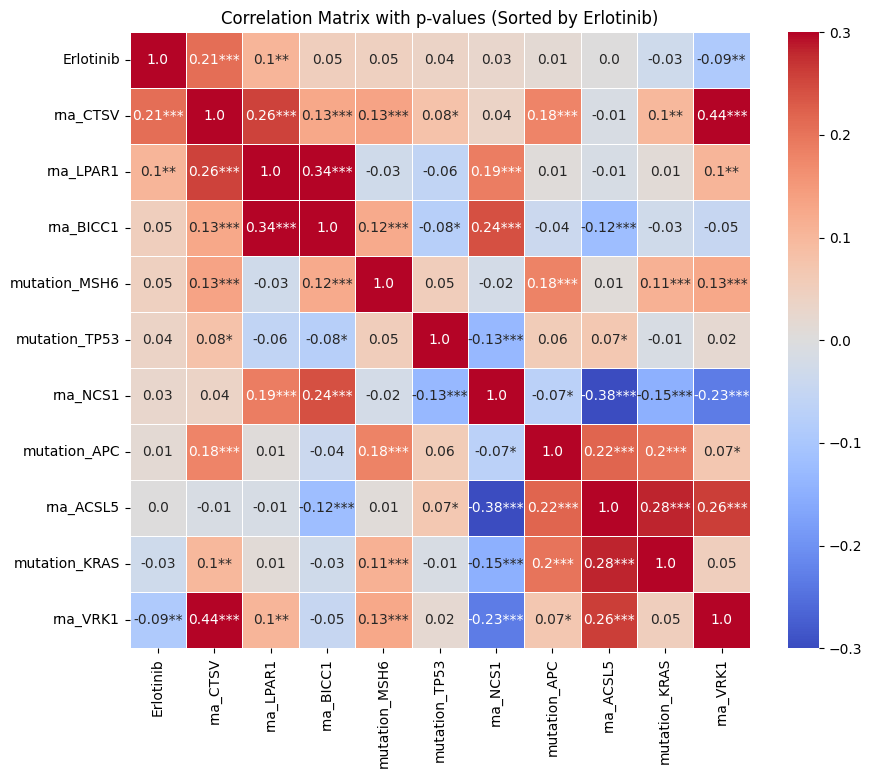

In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# 計算相關性矩陣和 p-value 矩陣
def calculate_corr_pvalues(df):
    corr_matrix = df.corr()
    pval_matrix = pd.DataFrame(np.ones(corr_matrix.shape), columns=df.columns, index=df.columns)  # 初始化 p-value 矩陣

    for row in df.columns:
        for col in df.columns:
            if row != col:  # 只計算不同基因之間的 p-value
                r, p = pearsonr(df[row], df[col])
                corr_matrix.loc[row, col] = r  # 存入相關係數
                pval_matrix.loc[row, col] = p  # 存入 p-value
            else:
                pval_matrix.loc[row, col] = np.nan  # 自己和自己不計算 p-value

    return corr_matrix, pval_matrix

# 確保 df 只有數值型數據
df_numeric = df.select_dtypes(include=["number"])

# 計算相關性和 p-value
corr_matrix, pval_matrix = calculate_corr_pvalues(df_numeric)

# 按照與 Erlotinib 的相關性排序
sorted_idx = corr_matrix["Erlotinib"].sort_values(ascending=False).index
corr_matrix = corr_matrix.reindex(index=sorted_idx, columns=sorted_idx)
pval_matrix = pval_matrix.reindex(index=sorted_idx, columns=sorted_idx)

# 建立 p-value 註記（小於 0.05 的標星）
def format_pvalue(p):
    if p < 0.001:
        return "***"
    elif p < 0.01:
        return "**"
    elif p < 0.05:
        return "*"
    else:
        return ""

# 建立 heatmap 註解矩陣（顯示相關性數值 + p-value 標星）
annot_matrix = corr_matrix.round(2).astype(str)  # 轉成字串，方便加標星
for row in pval_matrix.index:
    for col in pval_matrix.columns:
        annot_matrix.loc[row, col] += format_pvalue(pval_matrix.loc[row, col])

# 繪製 heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=annot_matrix, cmap="coolwarm", fmt="", linewidths=0.5,  
            vmin=-0.3, vmax=0.3)  # 設定顏色範圍，強調負相關
plt.title("Correlation Matrix with p-values (Sorted by Erlotinib)")
plt.show()



literature search: TP53 - yes, KRAS - yes, LPAR1 - yes, CTSV - yes, NCS1 -yes, VRK1 - yes, ACSL5 - yes, APC - yes, MSH6 - no, BICC1 - no